# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [1]:
# Ваш код здесь
import pandas as pd
import os
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-pavel-veretennikov-ccf14/shared/homeworks/python_ds_miniprojects/final_project/data/'

target_files = ['orders.csv', 'order_status.csv', 'products.csv']
data_files = []
for path, dirs, files in os.walk(way):
    for file in files:
        if file in target_files:
            file_path = os.path.join(path, file)
            data_files.append(file_path)
orders_df_list = []
order_status_df_list = []
products_df_list = []
df = pd.DataFrame()
for i in data_files:
    data = pd.read_csv(i)
    if 'orders.csv' in i:
        data['manager'] = i.split('/')[-2]
        data['date'] = i.split('/')[-3]
        orders_df_list.append(data)
        df_orders = pd.concat(orders_df_list, ignore_index=True)
    elif 'products.csv' in i:
        data['category'] = i.split('/')[-2]
        products_df_list.append(data)
        df_products = pd.concat(products_df_list, ignore_index=True)
    elif 'order_status.csv' in i:
        order_status_df_list.append(data)
        df_order_status = pd.concat(order_status_df_list, ignore_index=True)
        
file_name_1 = 'df_orders.csv'
file_name_2 = 'df_order_status.csv'
file_name_3 = 'df_products.csv'
df_orders.to_csv(file_name_1, index=False)
df_order_status.to_csv(file_name_2, index=False)
df_products.to_csv(file_name_3, index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Переведите колонку `date` в тип `datetime`.
      
2) Сгруппируйте данные по дате и посчитайте число уникальных заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
3) Отсортируйте данные по убыванию числа заказов и возьмите дату из верхней строчки.
      
</p>
</details>

In [2]:
# Ваш код здесь
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders_count = df_orders.groupby('date', as_index=False) \
    .agg({'order_id' : 'count'}) \
    .sort_values('order_id', ascending=False) \
    .rename(columns={'order_id' : 'orders'})
df_orders_count

,date,orders
13,2024-03-14,437
12,2024-03-13,339
0,2024-03-01,302
28,2024-03-29,241
25,2024-03-26,231
14,2024-03-15,225
4,2024-03-05,222
19,2024-03-20,222
5,2024-03-06,221
26,2024-03-27,203


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.
      
2) Чтобы все графики в ноутбуке имели одинаковое форматирование, можете установить общие настройки через `sns.set()`.
      
3) Постройте линейный график, где по оси `х` будут идти даты, а по оси `у` — количество заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.
      
</p>
</details>

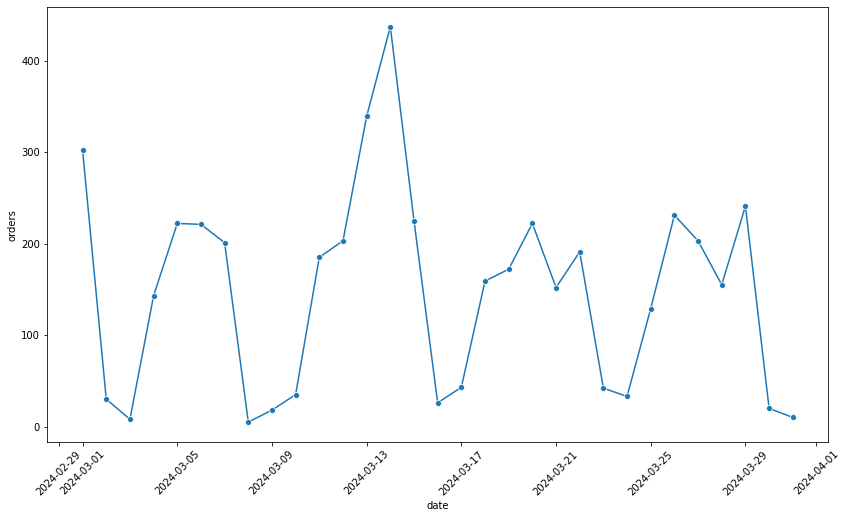

In [4]:
# Ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,8))
plt.xticks(rotation=45)
sns.lineplot(data = df_orders_count, x='date', y='orders', marker='o')

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Проверьте каждый из четырех предложенных поинтов: есть ли дни, соответствующие одному или нескольким поинтам? Посмотрите на график или на значения в датафрейме с количеством заказов по дням.
      
</p>
</details>

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Объедините датафреймы `df_orders` и `df_order_status` в новый `orders_status`.
      
2) Можете вывести первые строчки нового датафрейма и посмотреть его размер, чтобы убедиться, что объединение прошло корректно.
      
3) Сохраните датафрейм в csv файл с помощью метода, задав его название как строку `orders_status.csv` и параметр `index=False`.
      
4) Скачайте получившийся csv файл из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код. 
      
</p>
</details>

In [5]:
# Ваш код здесь
orders_status = pd.merge(df_orders, df_order_status, on='order_id', how='inner')
file_name = 'orders_status.csv'
orders_status.to_csv(file_name, index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Чтобы оставить в данных только информацию о том, был заказ подтвержден или отменен, выберите из датафрейма `orders_status` колонки с номером заказа и статусом, а затем удалите дубликаты (НЕ сохраняйте результат в тот же датафрейм, потому что `orders_status` в полном виде понадобится для решения следующих заданий).

2) Посчитайте частоту, с которой встречается каждый из статусов в оставшихся данных.

3) Посчитайте долю каждого из статусов. Значения округлите до 2 знаков после точки.

      
</p>
</details>

In [6]:
# Ваш код здесь
orders_status_filtered = orders_status[['order_id', 'status']]
orders_status_filtered = orders_status_filtered.drop_duplicates()
orders_status_filtered.status.value_counts(normalize=True).round(2)

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Данные в датафрейме `orders_status` сгруппируйте по дате и статусу, посчитайте количество уникальных заказов для каждой группы. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Разверните получившийся датафрейм так, чтобы получилась сводная таблица, где в индексе — даты, в колонках — статусы, а в значениях — количество заказов. 
      
3) Пропуски заполните нулями.
      
4) Из-за того, что после разворота таблицы в колонках `canceled` и `confirmed` появились пропущенные значения, тип данных в этих колонках стал `float`. Но число заказов не может быть дробным, поэтому приведите эти колонки к типу `int`.
      
5) Отфильтруйте строки, где значение в колонке `confirmed` равно нулю.
      
</p>
</details>

In [7]:
# Ваш код здесь
orders_by_date = orders_status.groupby(['date', 'status'], as_index=False) \
    .agg({'order_id' : 'nunique'}) \
    .rename(columns={'order_id' : 'orders'}) 
orders_pivot = orders_by_date.pivot(index='date', columns='status', values='orders') \
    .fillna(0)
orders_aboba = orders_pivot[['canceled', 'confirmed']].astype({'canceled': 'int', 'confirmed': 'int'})
orders_by_date

,date,status,orders
0,2024-03-01,canceled,2
1,2024-03-01,confirmed,20
2,2024-03-02,confirmed,2
3,2024-03-03,confirmed,1
4,2024-03-04,confirmed,10
5,2024-03-05,confirmed,18
6,2024-03-06,canceled,1
7,2024-03-06,confirmed,13
8,2024-03-07,canceled,1
9,2024-03-07,confirmed,13


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Постройте линейный график, где по оси `х` будут идти даты, по оси `у` — количество заказов, а цвета линий будут определены статусами заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.

</p>
</details>

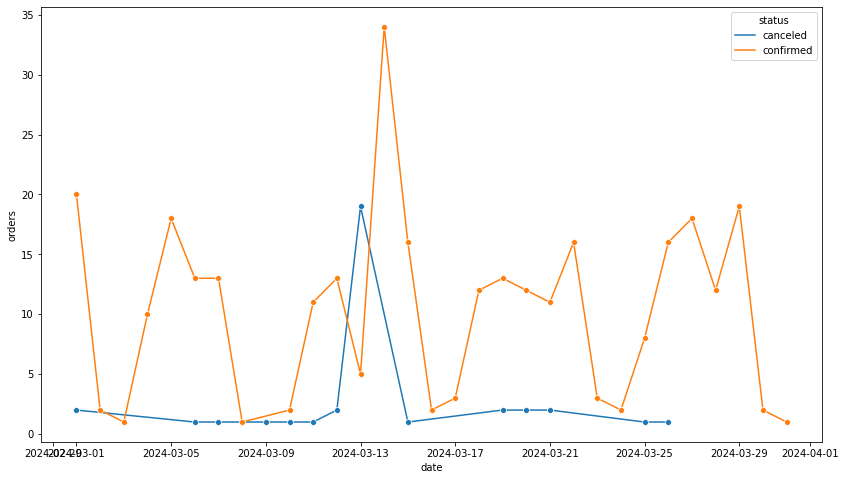

In [8]:
# Ваш код здесь
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=orders_by_date, x='date', y='orders', marker='o', hue='status')

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.
      
4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.
      
</p>
</details>

In [9]:
# Ваш код здесь
orders_13_03 = orders_status.query("date == '2024-03-13' & status== 'canceled'")

orders_13 = orders_13_03.groupby('order_id', as_index=False) \
    .agg({'product_id' : 'nunique', 'quantity' : 'sum', 'manager' : 'max', 'client_id' : 'max'})

orders_14_03 = orders_status.query("date == '2024-03-14' & status == 'confirmed'")

orders_14 = orders_14_03.groupby('order_id', as_index=False) \
    .agg({'product_id' : 'nunique', 'quantity' : 'sum', 'manager' : 'max', 'client_id' : 'max'})

orders_new = pd.merge(orders_13, orders_14, on=['manager', 'client_id', 'product_id', 'quantity'], how='inner')

x = 16 / 437
x

0.036613272311212815

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Откройте файл `usd_rate.txt` с помощью контекстного менеджера `with` и функции `open()`. Список строк сохраните в переменную `currency`.
      
2) С помощью функции `pd.DataFrame(columns=['col_name'])` создайте из списка датафрейм с любым названием единственной колонки.
      
3) На основе имеющейся колонки создайте колонки `date` и `currency_rate`, куда положите соответствующие данные. Для этого разделите общую строку со всеми данными и возьмите нужные данные по индексу.
      
4) Переведите колонку `date` в тип `datetime`.
      
5) Удалите из датафрейма ненужную колонку с общими данными.
      
6) Посчитайте среднее значение курса доллара за месяц.
      
7) Результат округлите до двух знаков после точки.   
      
</p>
</details>

In [11]:
# Ваш код здесь
with open ('usd_rate.txt', 'r', encoding='utf-8') as file:
    currency = [line.strip() for line in file.readlines()]
    
df = pd.DataFrame(currency, columns=['aboba'])

df[['date', 'currency_rate', 'curr']] = df['aboba'].str.split(',', expand=True)

df['date'] = pd.to_datetime(df['date'])

df_currency = df.drop('aboba', axis=1)

df_currency['currency_rate'] = pd.to_numeric(df_currency['currency_rate'], errors = 'coerce')

df_currency.currency_rate.mean().round(2)

91.7

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Присоедините к датафрейму `orders_status` датафрейм `df_products`, указав, что ключом в левом датафрейме будет являться колонка `product_id` (параметр `left_on`), а в правом — колонка `id` (параметр `right_on`). Новый датафрейм сохраните в `df_full`.
      
2) К датафрейму `df_full` добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм `df_currency` по общей колонке с датой.
      
3) Создайте колонку `price_rub` с ценами в рублях. Для этого умножьте значения в колонке `price` с ценами на значения в колонке `currency_rate` с курсом валюты.
      
4) Создайте колонку `revenue` с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку с количеством товара.
      
5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм `df_confirmed`, он вам ещё пригодится.
      
6) Суммируйте значения в колонке `revenue` и округлите результат до двух знаков после точки.
      
</p>
</details>

In [12]:
# Ваш код здесь
df_full = pd.merge(orders_status, df_products,
                       how='left',
                       left_on='product_id', right_on='id')

df_full = pd.merge(df_full, df_currency,
                  how='left',
                  on='date')

df_full['price_rub'] = df_full.price * df_full.currency_rate

df_full['revenue'] = df_full.quantity * df_full.price_rub

df_full_conf = df_full.query("status == 'confirmed'")

df_full_conf.revenue.sum().round(2)

2038231821.56

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Посчитайте число уникальных подтвержденных заказов.

2) Разделите сумму выручки, посчитанную на прошлом шаге (без округления), на это число.

3) Результат округлите до двух знаков после точки.  
      
</p>
</details>

In [14]:
# Ваш код здесь
df_full_conf.order_id.nunique()

309

In [15]:
x = 2038231821.564864 / 309
x

6596219.487264932

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

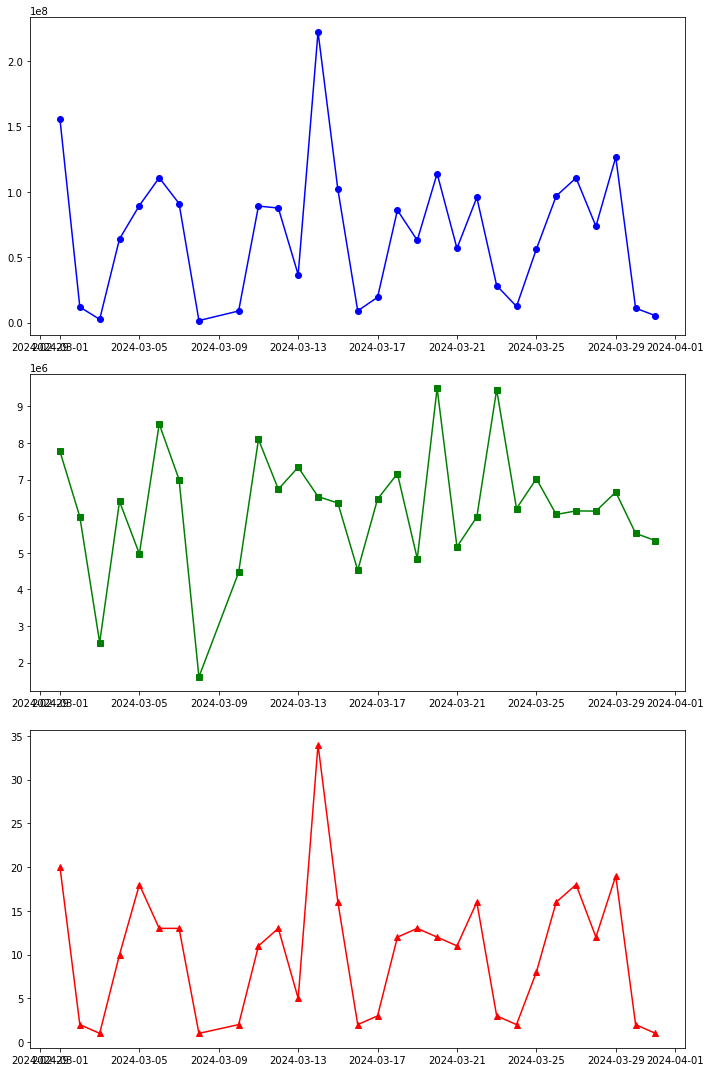

In [16]:
# Ваш код здесь
df_report_by_date = df_full_conf.groupby('date', as_index=False) \
    .agg({'order_id' : 'nunique', 'revenue' : 'sum'}) \
    .rename(columns={'order_id' : 'orders'})

df_report_by_date['aov'] = (df_report_by_date['revenue'] / df_report_by_date['orders']).round(2)

fig, axs = plt.subplots(3, 1, figsize=(10,15))
axs[0].plot(df_report_by_date['date'], df_report_by_date['revenue'], marker='o', color='b', label='revenue')
axs[1].plot(df_report_by_date['date'], df_report_by_date['aov'], marker='s', color='g', label='aov')
axs[2].plot(df_report_by_date['date'], df_report_by_date['orders'], marker='^', color='r', label='orders')

plt.tight_layout()

plt.show()

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [17]:
# Ваш код здесь
df_full['brand'] = df_full['name'].str.split(',').str[0]
df_full.brand.nunique()

121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [19]:
# Ваш код здесь
df_full.query("status == 'confirmed'") \
    .groupby('brand', as_index=False) \
    .agg({'revenue' : 'sum'}) \
    .sort_values('revenue', ascending=False)

,brand,revenue
46,JBL,2.665961e+08
43,Heco,2.388163e+08
53,Klipsch,2.039024e+08
120,Yamaha,1.658651e+08
49,KEF,1.465101e+08
...,...,...
8,AudioSource,3.388167e+04
40,Fosi Audio,3.129419e+04
1,ART,2.670040e+04
18,Bravo Audio,2.405086e+04


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сохраните в список `products_in_orders` уникальные идентификаторы товаров из датафрейма `df_confirmed`.
      
2) Создайте в датафрейме `df_products` новую колонку `is_in_orders`, в которой будет значение `yes`, если значение из колонки `id` этого датафрейма есть в списке `products_in_orders`. Если его в этом списке нет - в новую колонку для этой строчки запишите значение `no`.
      
3) Посчитайте количество встречающихся значений `yes` и  `no` в колонке `is_in_orders`.
      
</p>
</details>

In [21]:
# Ваш код здесь
product_in_orders = df_full_conf.id.unique()

df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in product_in_orders else 'no')

df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) В датафрейме `df_products` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке `name` и возьмите первое из них (сначала идет бренд и через запятую модель товара).
      
2) Сгруппируйте данные по бренду и колонке, в которой указано, есть товар в заказах, и посчитайте число уникальных товаров. Колонку с числом товаров можете переименовать в `products`.
      
3) Разверните сгруппированные данные так, чтобы получилась сводная таблица в которой в индексе названия брендов, в колонках - есть товар в заказах или нет (`yes` и `no`), в значениях - количество товаров.
      
4) Заполните пропуски нулями.
      
5) Сбросьте индекс, чтобы названия брендов стали колонкой.
      
6) Посчитайте общее число товаров для каждого бренда, сложив значения в колонках `yes` и `no`.
      
7) Для каждого бренда посчитайте долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
      
8) Отберите только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
      
</p>
</details>

In [22]:
# Ваш код здесь
df_products['brand'] = df_products['name'].str.split(',').str[0]

df_prod_brand = df_products.groupby(['brand', 'is_in_orders'], as_index=False) \
    .agg({'id' : 'nunique'}) \
    .rename(columns={'id' : 'products'})

df_prod_pivot = df_prod_brand.pivot(index='brand', columns='is_in_orders', values='products').fillna(0).reset_index(drop=False)

df_prod_pivot['sum'] = df_prod_pivot.no + df_prod_pivot.yes

df_prod_pivot['dolya'] = (df_prod_pivot['no'] / df_prod_pivot['sum']).round(2)

df_prod_pivot.query("sum > 15.0 & dolya > 0.5")

is_in_orders,brand,no,yes,sum,dolya
32,Dali,49.0,18.0,67.0,0.73
60,KEF,54.0,28.0,82.0,0.66
77,Marantz,19.0,3.0,22.0,0.86
94,Pioneer,70.0,33.0,103.0,0.68


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) Сгруппируйте данные с подтвержденными заказами из датафрейма `df_confirmed` по менеджерам и посчитайте для каждого сумму выручки и количество заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Отсортируйте записи по убыванию выручки.
      
3) Посчитайте процент выручки, приходящейся на каждого менеджера: разделите его выручку на суммарную выручку всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.
      
4) Посчитайте процент заказов, приходящихся на каждого менеджера: разделите его число заказов на суммарное число заказов всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.   
      
5) Постройте два барплота (столбиковые диаграммы): со значениями % выручки и % заказов у каждого менеджера.
      
</p>
</details>

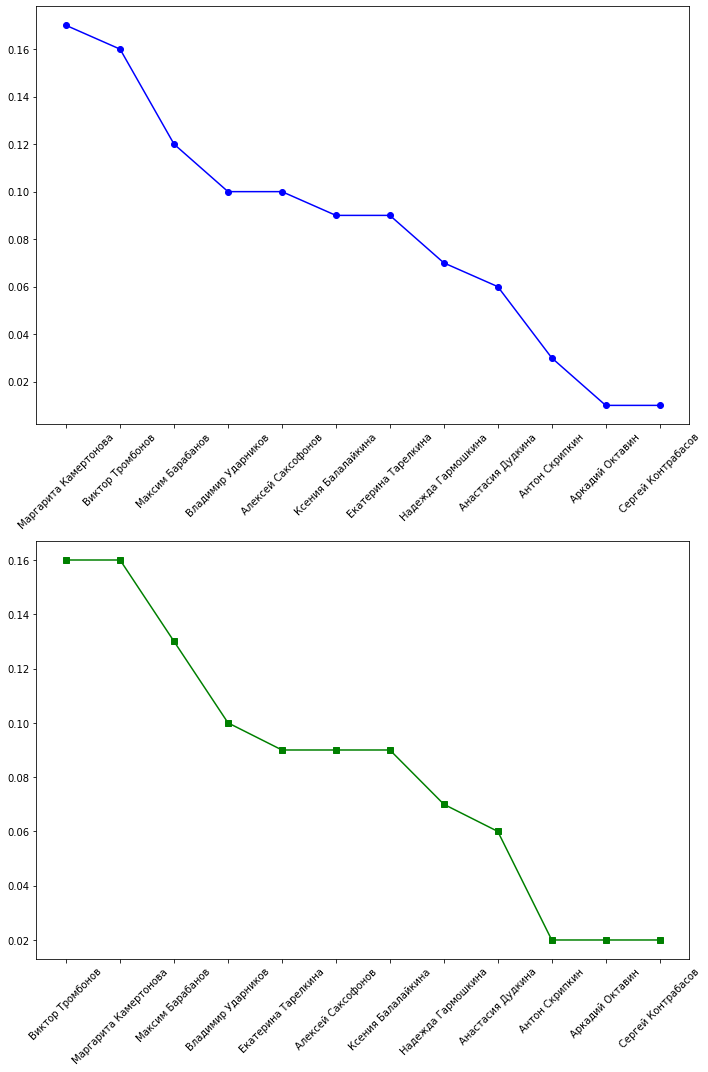

In [26]:
# Ваш код здесь
total_revenue = df_full_conf.revenue.sum()

df_managers = df_full_conf.groupby('manager', as_index=False) \
    .agg({'revenue' : 'sum'}) \
    .sort_values('revenue', ascending=False)

df_managers['dolya_rev'] = (df_managers['revenue'] / total_revenue).round(2)

total_orders_1 = df_full_conf.order_id.nunique()

df_managers_orders = df_full_conf.groupby('manager', as_index=False) \
    .agg({'order_id' : 'nunique'}) \
    .sort_values('order_id', ascending=False)

df_managers_orders['dolya'] = (df_managers_orders['order_id'] / total_orders_1).round(2)

fig, axs = plt.subplots(2, 1, figsize=(10,15))

# Первый график
axs[0].plot(df_managers['manager'], df_managers['dolya_rev'], marker='o', color='b', label='dolya_rev')
axs[0].set_xticks(range(len(df_managers['manager'])))  # Устанавливаем метки по оси X
axs[0].set_xticklabels(df_managers['manager'], rotation=45)  # Поворачиваем метки

# Второй график
axs[1].plot(df_managers_orders['manager'], df_managers_orders['dolya'], marker='s', color='g', label='dolya')
axs[1].set_xticks(range(len(df_managers_orders['manager'])))  # Устанавливаем метки по оси X
axs[1].set_xticklabels(df_managers_orders['manager'], rotation=45)  # Поворачиваем метки

plt.tight_layout()

plt.show()

## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!